<a href="https://colab.research.google.com/github/MahamadouNiakate/CV.github.io/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bitcoin.csv',delimiter=',')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,deseasonalized,linearized,log
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0,457.091490,6.124884,6.125414
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0,424.749480,6.051500,6.050771
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0,395.033172,5.978970,5.978369
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0,408.905349,6.013484,6.013480
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0,399.399844,5.989963,5.988513


In [3]:
df.set_index('Date', inplace=True)

In [4]:
df = df.loc['2017-01-01' : '2022-11-22']

In [5]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,deseasonalized,linearized,log
Date,,,,,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,147775008,0,0,999.773932,6.907529,6.906079
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992,0,0,1020.052250,6.927609,6.929272
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000,0,0,1043.227974,6.950075,6.950661
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984,0,0,1154.117625,7.051091,7.051622
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008,0,0,1014.118905,6.921775,6.921047
...,...,...,...,...,...,...,...,...,...,...
2022-08-19,23213.312500,23213.312500,20868.847656,20877.552734,40509610260,0,0,20890.095366,9.947030,9.946430
2022-08-20,20872.841797,21350.806641,20856.730469,21166.060547,27595671000,0,0,21166.130816,9.960158,9.960154
2022-08-21,21160.392578,21668.845703,21103.197266,21534.121094,23102307723,0,0,21565.374667,9.978844,9.977394


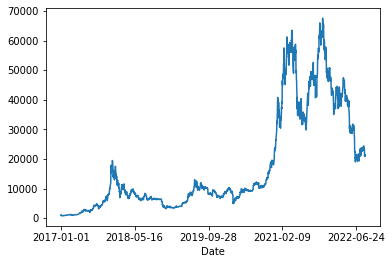

In [6]:
df['Close'].plot()

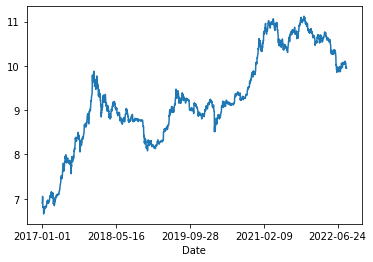

In [7]:
df['log'].plot()

In [8]:
y = df['log']
X  = df[['Open']]

In [9]:
#X = X.iloc[837:]
#y = y.iloc[837:]

In [10]:
y

Date
2017-01-01    6.906079
2017-01-02    6.929272
2017-01-03    6.950661
2017-01-04    7.051622
2017-01-05    6.921047
                ...   
2022-08-19    9.946430
2022-08-20    9.960154
2022-08-21    9.977394
2022-08-22    9.971095
2022-08-23    9.956599
Name: log, Length: 2061, dtype: float64

In [11]:
X.head()

,Open
Date,
2017-01-01,963.658020
2017-01-02,998.617004
2017-01-03,1021.599976
2017-01-04,1044.400024
2017-01-05,1156.729980


#Split Data

In [12]:
#train_test_split = int(X.shape[0] * 0.95)
#X_train = X[:train_test_split]
#X_test = X[train_test_split:]

#y_train = y[:train_test_split]
#y_test = y[train_test_split:]

#X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Scaled Data

In [13]:
#scaler = RobustScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

#Make Sequence

In [14]:
#def make_sequence(X,y,sequence_length):
  #X_tensor = []
  #y_tensor = []
  #for index in range(sequence_length,X.shape[0]):
    #X_tensor.append(X[index-sequence_length:index])
  # y_tensor.append(y.iloc[index-180:index].to_numpy())
    #y_tensor.append([y[index]])
  #X_tensor = np.array(X_tensor)
  #y_tensor = np.array(y_tensor)

  #return X_tensor, y_tensor

#X_tensor_train, y_tensor_train = make_sequence(X_train_scaled,y_train,99)
#X_tensor_test, y_tensor_test = make_sequence(X_test_scaled,y_test,99)

In [15]:
#X_tensor_train.shape, y_tensor_train.shape, X_tensor_test.shape, y_tensor_test.shape

#New Scale

In [16]:
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df[['Close']])
scaled_close.shape


(2061, 1)

#Reshape

In [17]:
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close =  scaled_close.reshape(-1,1)
scaled_close.shape

(2061, 1)

# New Make Sequence

In [18]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
  d = []

  for index in range(len(data) - seq_len):
    d.append(data[index: index + seq_len])

  return np.array(d)

def preprocess(data_raw, seq_len, train_split):

  data = to_sequences(data_raw, seq_len)
  num_train = int(train_split * data.shape[0])
  X_train = data[:num_train, :-1, :]
  y_train = data[:num_train, -1, :]

  X_test = data[num_train:, :-1, :]
  y_test = data[num_train:, -1, :]

  return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)



In [19]:
X_train.shape, X_test.shape

((1862, 99, 1), (99, 99, 1))

In [20]:
y_train[:]

array([[0.00612934],
       [0.00639705],
       [0.00632758],
       ...,
       [0.42679657],
       [0.43904651],
       [0.45707113]])

In [21]:
y_train.shape

(1862, 1)

#Neural Network

In [22]:
model = Sequential()
#input_dim= (X_train.shape[1],X_train.shape[-1])

model.add(layers.SimpleRNN(10, input_shape=(X_train.shape[1], X_train.shape[-1]),activation='tanh'))

model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dropout(rate=0.2)) 

model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(rate=0.2)) 


model.add(layers.Dense(1, activation='linear'))

In [23]:
X_train.shape[1]

99

In [24]:
y_train[0]

array([0.00612934])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 15)                165       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 128       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 422
Trainable params: 422
Non-trainable pa

In [26]:
rmsprop_opt = optimizers.RMSprop(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True)

#mean_absolute_error'
#rmsprop_opt

model.compile(loss='mean_squared_error', optimizer=rmsprop_opt, metrics=['mae','mape'])
history = model.fit(X_train,
                    y_train, 
                    batch_size=16, 
                    epochs=500, 
                    validation_split=0.1,
                    callbacks=[es])

Epoch 1/500
105/105 [==============================] - 5s 24ms/step - loss: 0.0309 - mae: 0.0928 - mape: 57.8891 - val_loss: 0.0029 - val_mae: 0.0446 - val_mape: 6.6883
Epoch 2/500
105/105 [==============================] - 2s 19ms/step - loss: 0.0101 - mae: 0.0500 - mape: 39.4726 - val_loss: 0.0020 - val_mae: 0.0345 - val_mape: 5.0330
Epoch 3/500
105/105 [==============================] - 2s 19ms/step - loss: 0.0086 - mae: 0.0485 - mape: 43.9434 - val_loss: 0.0036 - val_mae: 0.0529 - val_mape: 8.7436
Epoch 4/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0076 - mae: 0.0461 - mape: 44.2112 - val_loss: 0.0188 - val_mae: 0.1330 - val_mape: 20.4746
Epoch 5/500
105/105 [==============================] - 1s 8ms/step - loss: 0.0071 - mae: 0.0460 - mape: 44.9726 - val_loss: 0.0115 - val_mae: 0.1013 - val_mape: 15.3192
Epoch 6/500
105/105 [==============================] - 1s 9ms/step - loss: 0.0073 - mae: 0.0460 - mape: 42.2902 - val_loss: 0.0121 - val_mae: 0.1045 - val

In [27]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    #ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('Model mae')
    ax[1].set_ylabel('mae')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    #ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

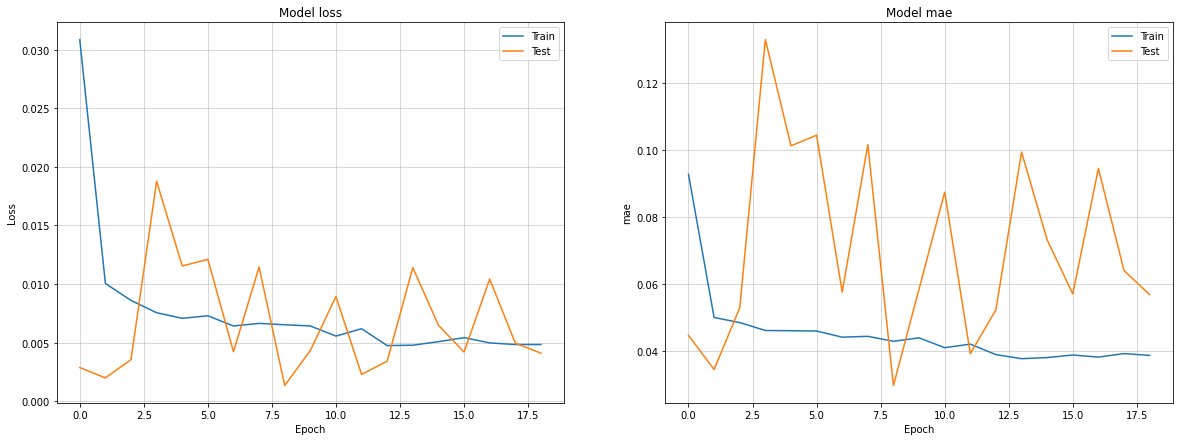

In [28]:
plot_loss_accuracy(history)

In [29]:
testPredict = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.0019 - mae: 0.0376 - mape: 11.0682


In [30]:
model.evaluate(X_train, y_train)

59/59 [==============================] - 0s 3ms/step - loss: 8.9037e-04 - mae: 0.0233 - mape: 38.4039


[0.000890372961293906, 0.023328103125095367, 38.403892517089844]

In [31]:
y_pred = model.predict(X_test)

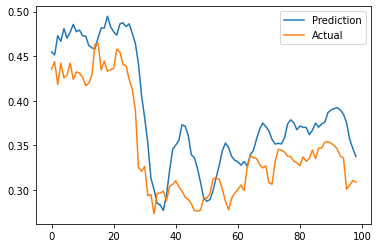

In [32]:
plt.plot(y_pred, label='Prediction')
plt.plot(y_test, label='Actual')
plt.legend()

In [33]:
y_hat = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test)

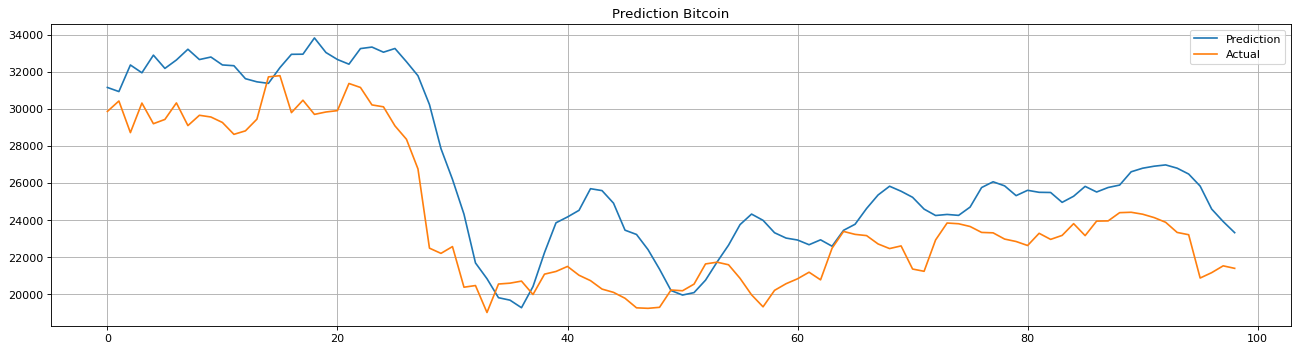

In [34]:
from matplotlib.pyplot import figure
figure(figsize=(20, 5), dpi=80)
plt.grid(True)
plt.title('Prediction Bitcoin')
plt.plot(y_hat, label='Prediction')
plt.plot(y_test_inverse, label='Actual')
plt.legend()

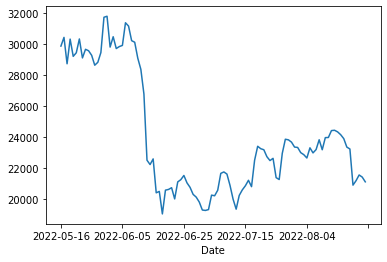

In [35]:
df['Close'][-100:].plot()

In [36]:
#SEQ_LEN = 100
last_sequence = X_test[-1:]
last = model.predict(last_sequence.reshape(-1,1))

In [37]:
last_value = scaler.inverse_transform(last)

In [38]:
last_value[-1]

array([20356.152], dtype=float32)

In [39]:
y_test_inverse[-1]

array([21398.90820312])

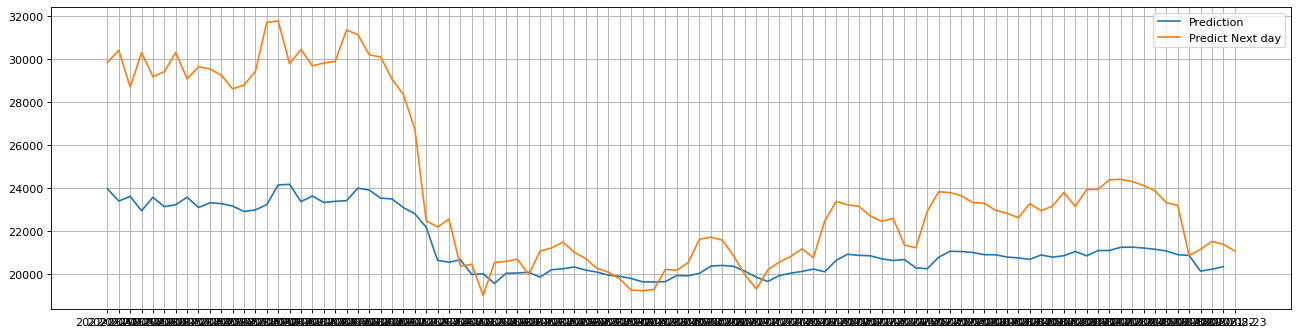

In [40]:
from matplotlib.pyplot import figure
figure(figsize=(20, 5), dpi=80)
plt.grid(True)
last_value = pd.DataFrame(last_value)
plt.plot(last_value, label='Prediction')
plt.plot(df['Close'][-100:], label='Predict Next day')
plt.legend()

In [41]:
last_value

,0
0,23985.167969
1,23410.841797
2,23631.015625
3,22962.962891
4,23587.425781
...,...
94,20918.435547
95,20880.037109
96,20150.804688
97,20241.068359


In [42]:
X_train.shape, y_train.shape

((1862, 99, 1), (1862, 1))